# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [2]:
### Combinations ###
DataTypeVec = ["BostonHousingBinned"]
ModelTypeVec = ["TreeFarms"]
RelativeVec = ["Passive", None]
Combinations = list(itertools.product(DataTypeVec, ModelTypeVec, RelativeVec))


In [3]:
### Set Up ###
WRSTResultsDict = {}

### Get Results ###
for i in range(0, len(Combinations)):

    ### Set Up ###
    DataType = Combinations[i][0]
    ModelType = Combinations[i][1]
    RelativeType = Combinations[i][2]
    PlotArgs = {"TransparencyVal" : 0.00, "CriticalValue" : 1.96, "RelativeError" : RelativeType}
    
    ### Get Results ###
    WRSTResults, MeanPlot, VariancePlot =  MakePlotFunctions(DataType, ModelType, PlotArgs, SaveInput = "Dec2")
    
    ### Save WRST Results ###
    if DataType not in WRSTResultsDict:
        WRSTResultsDict[DataType] = {}
    WRSTResultsDict[DataType][ModelType] = WRSTResults

TypeError: Could not convert ['0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.088235294117647080.137254901960784270.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.127450980392156850.107843137254901910.078431372549019660.15686274509803920.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.09803921568627450.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.117647058823529440.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.107843137254901910.088235294117647080.137254901960784270.058823529411764720.186274509803921570.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.117647058823529440.058823529411764720.068627450980392140.078431372549019660.088235294117647080.117647058823529440.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.088235294117647080.137254901960784270.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.127450980392156850.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.09803921568627450.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.117647058823529440.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.186274509803921570.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.117647058823529440.058823529411764720.068627450980392140.078431372549019660.088235294117647080.117647058823529440.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.088235294117647080.137254901960784270.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.127450980392156850.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.186274509803921570.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.117647058823529440.058823529411764720.068627450980392140.078431372549019660.088235294117647080.117647058823529440.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.088235294117647080.137254901960784270.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.186274509803921570.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.117647058823529440.058823529411764720.068627450980392140.078431372549019660.088235294117647080.117647058823529440.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.088235294117647080.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.127450980392156850.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.137254901960784270.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.088235294117647080.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.127450980392156850.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.117647058823529440.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.127450980392156850.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.127450980392156850.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.088235294117647080.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.058823529411764720.127450980392156850.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.078431372549019660.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.176470588235294160.117647058823529440.09803921568627450.09803921568627450.09803921568627450.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.088235294117647080.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.127450980392156850.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.127450980392156850.058823529411764720.068627450980392140.078431372549019660.088235294117647080.117647058823529440.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.058823529411764720.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.088235294117647080.107843137254901910.088235294117647080.09803921568627450.14705882352941180.176470588235294160.117647058823529440.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.088235294117647080.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.127450980392156850.15686274509803920.127450980392156850.068627450980392140.137254901960784270.107843137254901910.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.09803921568627450.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.107843137254901910.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.088235294117647080.137254901960784270.078431372549019660.09803921568627450.14705882352941180.176470588235294160.117647058823529440.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.088235294117647080.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.078431372549019660.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.107843137254901910.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.117647058823529440.088235294117647080.04901960784313730.068627450980392140.107843137254901910.088235294117647080.078431372549019660.09803921568627450.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.09803921568627450.107843137254901910.127450980392156850.09803921568627450.107843137254901910.088235294117647080.137254901960784270.078431372549019660.09803921568627450.14705882352941180.176470588235294160.117647058823529440.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.088235294117647080.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.107843137254901910.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.107843137254901910.088235294117647080.04901960784313730.068627450980392140.107843137254901910.078431372549019660.078431372549019660.09803921568627450.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.078431372549019660.09803921568627450.14705882352941180.176470588235294160.107843137254901910.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.058823529411764720.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.14705882352941180.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.107843137254901910.088235294117647080.04901960784313730.068627450980392140.107843137254901910.078431372549019660.078431372549019660.09803921568627450.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.078431372549019660.09803921568627450.14705882352941180.176470588235294160.107843137254901910.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.127450980392156850.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.15686274509803920.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.107843137254901910.088235294117647080.04901960784313730.068627450980392140.127450980392156850.078431372549019660.078431372549019660.09803921568627450.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.107843137254901910.127450980392156850.09803921568627450.107843137254901910.08823529411764708[0.13725490196078427]0.078431372549019660.09803921568627450.14705882352941180.176470588235294160.107843137254901910.09803921568627450.09803921568627450.078431372549019660.078431372549019660.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.127450980392156850.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.09803921568627450.09803921568627450.04901960784313730.107843137254901910.088235294117647080.04901960784313730.068627450980392140.127450980392156850.078431372549019660.078431372549019660.107843137254901910.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.137254901960784270.058823529411764720.117647058823529440.09803921568627450.107843137254901910.117647058823529440.107843137254901910.078431372549019660.117647058823529440.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.107843137254901910.127450980392156850.09803921568627450.107843137254901910.06862745098039214[0.13725490196078427]0.088235294117647080.09803921568627450.14705882352941180.09803921568627450.107843137254901910.09803921568627450.09803921568627450.078431372549019660.068627450980392140.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.15686274509803920.127450980392156850.068627450980392140.137254901960784270.117647058823529440.078431372549019660.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.10784313725490191'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.107843137254901910.09803921568627450.0392156862745097760.107843137254901910.09803921568627450.04901960784313730.068627450980392140.127450980392156850.078431372549019660.078431372549019660.117647058823529440.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.15686274509803920.04901960784313730.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.088235294117647080.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.107843137254901910.127450980392156850.09803921568627450.107843137254901910.09803921568627450.107843137254901910.078431372549019660.09803921568627450.14705882352941180.09803921568627450.107843137254901910.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.107843137254901910.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.137254901960784270.04901960784313730.117647058823529440.1568627450980392[0.12745098039215685]0.068627450980392140.137254901960784270.107843137254901910.078431372549019660.058823529411764720.068627450980392140.078431372549019660.08823529411764708[0.13725490196078427]0.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.107843137254901910.09803921568627450.0392156862745097760.107843137254901910.09803921568627450.04901960784313730.068627450980392140.09803921568627450.078431372549019660.078431372549019660.117647058823529440.088235294117647080.137254901960784270.215686274509803930.078431372549019660.029411764705882360.068627450980392140.15686274509803920.04901960784313730.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.088235294117647080.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.09803921568627450.127450980392156850.09803921568627450.107843137254901910.09803921568627450.107843137254901910.078431372549019660.09803921568627450.14705882352941180.09803921568627450.107843137254901910.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.107843137254901910.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.107843137254901910.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.15686274509803920.04901960784313730.117647058823529440.1568627450980392[0.12745098039215685]0.068627450980392140.137254901960784270.107843137254901910.078431372549019660.058823529411764720.068627450980392140.078431372549019660.088235294117647080.127450980392156850.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.107843137254901910.09803921568627450.0392156862745097760.107843137254901910.088235294117647080.04901960784313730.068627450980392140.09803921568627450.078431372549019660.078431372549019660.117647058823529440.088235294117647080.137254901960784270.215686274509803930.078431372549019660.0392156862745097760.068627450980392140.15686274509803920.04901960784313730.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.088235294117647080.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.09803921568627450.127450980392156850.09803921568627450.107843137254901910.09803921568627450.107843137254901910.078431372549019660.09803921568627450.14705882352941180.09803921568627450.107843137254901910.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.088235294117647080.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.107843137254901910.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.15686274509803920.04901960784313730.117647058823529440.1568627450980392[0.12745098039215685]0.068627450980392140.137254901960784270.107843137254901910.078431372549019660.058823529411764720.068627450980392140.078431372549019660.088235294117647080.127450980392156850.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.09803921568627450.09803921568627450.0392156862745097760.107843137254901910.088235294117647080.058823529411764720.068627450980392140.09803921568627450.078431372549019660.078431372549019660.117647058823529440.088235294117647080.137254901960784270.215686274509803930.078431372549019660.0392156862745097760.068627450980392140.15686274509803920.04901960784313730.117647058823529440.09803921568627450.127450980392156850.117647058823529440.107843137254901910.088235294117647080.107843137254901910.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.137254901960784270.04901960784313730.088235294117647080.107843137254901910.09803921568627450.127450980392156850.09803921568627450.107843137254901910.09803921568627450.107843137254901910.078431372549019660.09803921568627450.14705882352941180.09803921568627450.107843137254901910.09803921568627450.09803921568627450.09803921568627450.068627450980392140.09803921568627450.078431372549019660.088235294117647080.078431372549019660.107843137254901910.088235294117647080.117647058823529440.117647058823529440.117647058823529440.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.107843137254901910.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.15686274509803920.04901960784313730.117647058823529440.1568627450980392[0.12745098039215685]0.068627450980392140.137254901960784270.107843137254901910.078431372549019660.058823529411764720.068627450980392140.078431372549019660.088235294117647080.127450980392156850.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.09803921568627450.068627450980392140.078431372549019660.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.088235294117647080.058823529411764720.068627450980392140.09803921568627450.078431372549019660.078431372549019660.117647058823529440.088235294117647080.137254901960784270.215686274509803930.09803921568627450.0392156862745097760.078431372549019660.15686274509803920.04901960784313730.117647058823529440.09803921568627450.127450980392156850.107843137254901910.107843137254901910.078431372549019660.117647058823529440.117647058823529440.058823529411764720.078431372549019660.058823529411764720.117647058823529440.117647058823529440.04901960784313730.088235294117647080.107843137254901910.107843137254901910.117647058823529440.107843137254901910.107843137254901910.068627450980392140.107843137254901910.088235294117647080.09803921568627450.107843137254901910.09803921568627450.107843137254901910.09803921568627450.09803921568627450.09803921568627450.088235294117647080.09803921568627450.078431372549019660.088235294117647080.078431372549019660.088235294117647080.088235294117647080.117647058823529440.117647058823529440.107843137254901910.068627450980392140.117647058823529440.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.04901960784313730.117647058823529440.0392156862745097760.088235294117647080.088235294117647080.088235294117647080.15686274509803920.04901960784313730.088235294117647080.1568627450980392[0.12745098039215685]0.068627450980392140.137254901960784270.107843137254901910.068627450980392140.058823529411764720.068627450980392140.078431372549019660.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.107843137254901910.068627450980392140.058823529411764720.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.09803921568627450.058823529411764720.068627450980392140.09803921568627450.078431372549019660.088235294117647080.107843137254901910.088235294117647080.107843137254901910.215686274509803930.09803921568627450.029411764705882360.078431372549019660.137254901960784270.058823529411764720.117647058823529440.09803921568627450.127450980392156850.117647058823529440.068627450980392140.078431372549019660.117647058823529440.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.127450980392156850.04901960784313730.078431372549019660.09803921568627450.09803921568627450.127450980392156850.09803921568627450.14705882352941180.068627450980392140.09803921568627450.088235294117647080.088235294117647080.107843137254901910.09803921568627450.107843137254901910.09803921568627450.06862745098039214[0.10784313725490191]0.09803921568627450.09803921568627450.078431372549019660.078431372549019660.078431372549019660.14705882352941180.088235294117647080.117647058823529440.107843137254901910.078431372549019660.068627450980392140.107843137254901910.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.058823529411764720.117647058823529440.0392156862745097760.088235294117647080.107843137254901910.088235294117647080.15686274509803920.04901960784313730.088235294117647080.15686274509803920.088235294117647080.068627450980392140.137254901960784270.107843137254901910.068627450980392140.068627450980392140.068627450980392140.068627450980392140.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'
 '0.09803921568627450.127450980392156850.107843137254901910.068627450980392140.058823529411764720.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.09803921568627450.058823529411764720.068627450980392140.09803921568627450.078431372549019660.088235294117647080.107843137254901910.078431372549019660.107843137254901910.215686274509803930.09803921568627450.029411764705882360.078431372549019660.137254901960784270.058823529411764720.117647058823529440.09803921568627450.127450980392156850.117647058823529440.068627450980392140.078431372549019660.117647058823529440.117647058823529440.058823529411764720.078431372549019660.058823529411764720.127450980392156850.127450980392156850.04901960784313730.078431372549019660.09803921568627450.09803921568627450.127450980392156850.09803921568627450.14705882352941180.068627450980392140.09803921568627450.088235294117647080.088235294117647080.107843137254901910.09803921568627450.107843137254901910.09803921568627450.06862745098039214[0.10784313725490191]0.09803921568627450.09803921568627450.078431372549019660.078431372549019660.078431372549019660.14705882352941180.088235294117647080.078431372549019660.107843137254901910.078431372549019660.068627450980392140.107843137254901910.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.058823529411764720.117647058823529440.0392156862745097760.088235294117647080.107843137254901910.088235294117647080.15686274509803920.04901960784313730.088235294117647080.15686274509803920.088235294117647080.068627450980392140.137254901960784270.107843137254901910.068627450980392140.068627450980392140.068627450980392140.068627450980392140.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'
 '0.088235294117647080.127450980392156850.107843137254901910.068627450980392140.058823529411764720.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.088235294117647080.058823529411764720.068627450980392140.09803921568627450.078431372549019660.088235294117647080.107843137254901910.078431372549019660.107843137254901910.215686274509803930.09803921568627450.029411764705882360.078431372549019660.137254901960784270.058823529411764720.117647058823529440.09803921568627450.127450980392156850.117647058823529440.068627450980392140.078431372549019660.117647058823529440.117647058823529440.058823529411764720.078431372549019660.068627450980392140.127450980392156850.127450980392156850.04901960784313730.078431372549019660.09803921568627450.09803921568627450.127450980392156850.09803921568627450.107843137254901910.068627450980392140.09803921568627450.088235294117647080.088235294117647080.107843137254901910.09803921568627450.107843137254901910.09803921568627450.06862745098039214[0.10784313725490191]0.09803921568627450.09803921568627450.078431372549019660.078431372549019660.078431372549019660.14705882352941180.088235294117647080.078431372549019660.107843137254901910.078431372549019660.068627450980392140.107843137254901910.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.058823529411764720.117647058823529440.0392156862745097760.088235294117647080.107843137254901910.088235294117647080.15686274509803920.04901960784313730.088235294117647080.15686274509803920.088235294117647080.068627450980392140.137254901960784270.107843137254901910.068627450980392140.068627450980392140.068627450980392140.068627450980392140.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'
 '0.088235294117647080.127450980392156850.107843137254901910.068627450980392140.058823529411764720.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.088235294117647080.058823529411764720.068627450980392140.09803921568627450.078431372549019660.088235294117647080.107843137254901910.078431372549019660.107843137254901910.215686274509803930.09803921568627450.029411764705882360.078431372549019660.137254901960784270.068627450980392140.117647058823529440.09803921568627450.127450980392156850.117647058823529440.068627450980392140.078431372549019660.117647058823529440.107843137254901910.058823529411764720.078431372549019660.068627450980392140.117647058823529440.127450980392156850.04901960784313730.078431372549019660.09803921568627450.09803921568627450.127450980392156850.09803921568627450.107843137254901910.068627450980392140.09803921568627450.088235294117647080.088235294117647080.107843137254901910.09803921568627450.107843137254901910.09803921568627450.06862745098039214[0.10784313725490191]0.09803921568627450.09803921568627450.078431372549019660.078431372549019660.078431372549019660.14705882352941180.088235294117647080.078431372549019660.107843137254901910.078431372549019660.068627450980392140.107843137254901910.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.058823529411764720.117647058823529440.0392156862745097760.088235294117647080.107843137254901910.088235294117647080.15686274509803920.04901960784313730.088235294117647080.15686274509803920.088235294117647080.068627450980392140.137254901960784270.107843137254901910.068627450980392140.068627450980392140.068627450980392140.068627450980392140.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'
 '0.088235294117647080.127450980392156850.107843137254901910.068627450980392140.058823529411764720.088235294117647080.09803921568627450.09803921568627450.058823529411764720.117647058823529440.088235294117647080.058823529411764720.068627450980392140.09803921568627450.078431372549019660.088235294117647080.107843137254901910.078431372549019660.107843137254901910.215686274509803930.09803921568627450.029411764705882360.078431372549019660.137254901960784270.068627450980392140.117647058823529440.09803921568627450.127450980392156850.117647058823529440.068627450980392140.078431372549019660.117647058823529440.107843137254901910.058823529411764720.078431372549019660.068627450980392140.127450980392156850.127450980392156850.04901960784313730.088235294117647080.09803921568627450.09803921568627450.127450980392156850.09803921568627450.107843137254901910.068627450980392140.09803921568627450.088235294117647080.088235294117647080.107843137254901910.09803921568627450.117647058823529440.09803921568627450.06862745098039214[0.10784313725490191]0.09803921568627450.09803921568627450.078431372549019660.078431372549019660.078431372549019660.14705882352941180.088235294117647080.078431372549019660.107843137254901910.078431372549019660.068627450980392140.107843137254901910.078431372549019660.09803921568627450.058823529411764720.058823529411764720.068627450980392140.088235294117647080.078431372549019660.058823529411764720.117647058823529440.0392156862745097760.088235294117647080.107843137254901910.088235294117647080.15686274509803920.04901960784313730.088235294117647080.15686274509803920.088235294117647080.068627450980392140.137254901960784270.107843137254901910.068627450980392140.068627450980392140.068627450980392140.068627450980392140.088235294117647080.107843137254901910.107843137254901910.0392156862745097760.0980392156862745'] to numeric

---

In [4]:
DataType = "BostonHousingBinned"
RandomForest = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/RandomForestClassification/ProcessedResults/MTRandomForestClassification_UEI1_RashomonNum10_ErrorMatrix.csv", header = None)
TreeFarms1_Unique = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI1_RashomonNum1_ErrorMatrix.csv")
TreeFarms1_Duplicates = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI0_RashomonNum1_ErrorMatrix.csv")
TreeFarms2_Unique = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI1_RashomonNum2_ErrorMatrix.csv")
TreeFarms2_Duplicates = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI0_RashomonNum2_ErrorMatrix.csv")
TreeFarms100_Dupicates = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI0_RashomonNum100_ErrorMatrix.csv", header = 0)
TreeFarms10_Dupicates = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI0_RashomonNum10_ErrorMatrix.csv", header = 0)
TreeFarms10_Unique = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI1_RashomonNum10_ErrorMatrix.csv", header = 0)
TreeFarms100_Unique = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/STTreeEnsembleQBC_MTTreeFarms_UEI1_RashomonNum100_ErrorMatrix.csv", header = 0)


(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

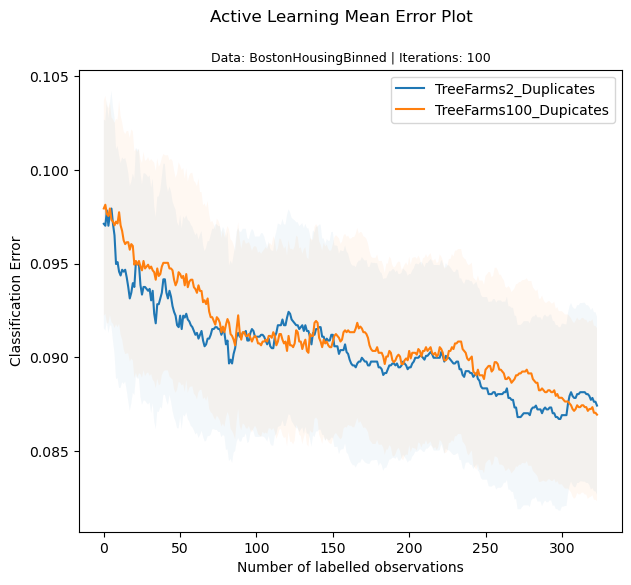

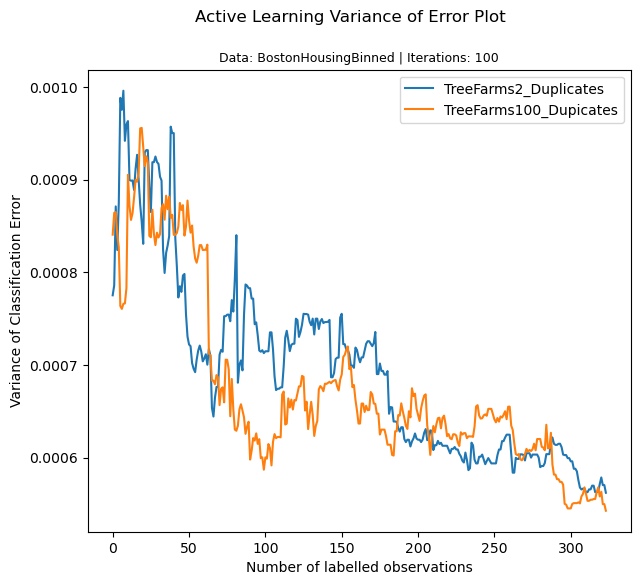

In [7]:

### Set Up ###
MeanVector = {}
VarianceVector = {}
StdErrorVector ={}
Y_Label = "Classification Error"

PlotSubtitle = (
        f"Data: {DataType} | Iterations: {RandomForest.shape[0]}"
    )
MeanVariancePlot(RelativeError = None,
                 # RandomForest = RandomForest,
                 # TreeFarms1_Unique = TreeFarms1_Unique,
                 # TreeFarms1_Duplicates = TreeFarms1_Duplicates,
                #  TreeFarms2_Unique = TreeFarms1_Unique,
                 TreeFarms2_Duplicates = TreeFarms1_Duplicates,
                #  TreeFarms10_Dupicates = TreeFarms10_Dupicates,
                 # TreeFarms10_Unique = TreeFarms10_Unique,
                 TreeFarms100_Dupicates = TreeFarms100_Dupicates,
                #  TreeFarms100_Unique = TreeFarms100_Unique,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 CriticalValue = 1.96)

In [5]:

import numpy as np
np.log(1)*1

0.0

---